In [1]:
from IPython.core.display import Markdown, display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
import pandas as pd
import numpy as np
import scipy.stats as ss
import matplotlib.pyplot as plt
plt.rcParams['axes.axisbelow'] = True

import sys
import os
from os import path

from plot_in_out_dist import plot_in_out_dist

out_dir = "thesis_plots/composition_example"
if not path.exists(out_dir):
    os.makedirs(out_dir)

model_1.coef_ [0.94987028]
model_1.intercept_ 0.6039293573522828


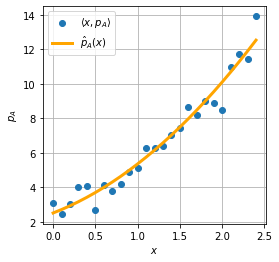

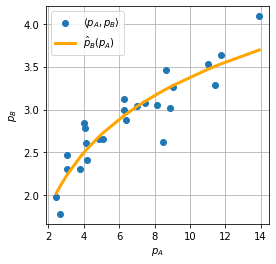

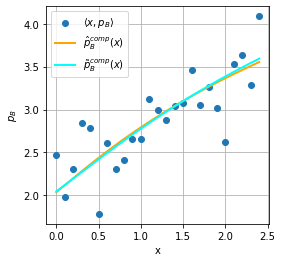

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

t_x_p_A = lambda x: 1 + (1 + x)**2
t_p_A_x = lambda p_A: np.sqrt(p_A - 1) - 1

t_p_A_p_B = lambda p_A: np.log(p_A) + 1
t_p_B_p_A = lambda p_B: np.exp(p_B - 1)

d1 = pd.DataFrame({'x': np.arange(0.0, 2.5, 0.1)})
np.random.seed(0)
d1['p_A'] = t_x_p_A(d1.x) + np.random.normal(0.0, 0.6, len(d1.x))
np.random.seed(0)
d1['p_B'] = t_p_A_p_B(d1.p_A) + np.random.normal(0.0, 0.2, len(d1.p_A))

d1_1 = d1.sort_values(by='x')
x_est_1 = d1_1.x.values
model_1 = LinearRegression().fit(t_x_p_A(x_est_1.reshape(-1, 1)), d1.p_A)
print("model_1.coef_", model_1.coef_)
print("model_1.intercept_", model_1.intercept_)
p_A_est_1 = model_1.predict(t_x_p_A(x_est_1.reshape(-1, 1)))

fig = plt.figure()
plt.grid()
plt.scatter(d1.x, d1.p_A, label=r'$\langle x, p_A \rangle$')
plt.plot(x_est_1, p_A_est_1, color='orange', linewidth=3, label='$\hat{p}_A(x)$')
plt.xlabel('$x$')
plt.ylabel('$p_A$')
plt.legend()
fig.set_size_inches([4, 4])
fig.savefig(f"{out_dir}/x-p_A--linear-regression.pdf", bbox_inches='tight')
plt.show()

d1_2 = d1.sort_values(by='p_A')
p_A_est_2 = d1_2.p_A.values
model_2 = make_pipeline(PolynomialFeatures(1), LinearRegression()).fit(t_p_A_p_B(p_A_est_2.reshape(-1, 1)), d1_2.p_B)
p_B_est_2 = model_2.predict(t_p_A_p_B(p_A_est_2.reshape(-1, 1)))

fig = plt.figure()
plt.grid()
plt.scatter(d1.p_A, d1.p_B, label=r'$\langle p_A, p_B \rangle$')
plt.plot(p_A_est_2, p_B_est_2, color='orange', linewidth=3, label='$\hat{p}_B(p_A)$')
plt.xlabel('$p_A$')
plt.ylabel('$p_B$')
plt.legend()
fig.set_size_inches([4, 4])
fig.savefig(f"{out_dir}/p_A-p_B--linear-regression.pdf", bbox_inches='tight')
plt.show()

d1_3 = d1.sort_values(by='x')
x_est_3 = d1_3.x.values
model_3 = make_pipeline(PolynomialFeatures(1), LinearRegression()).fit(t_p_A_p_B(t_x_p_A(x_est_3.reshape(-1, 1))), d1_2.p_B)
p_B_est_3 = model_3.predict(t_p_A_p_B(t_x_p_A(x_est_3.reshape(-1, 1))))

p_A_comp_est = model_1.predict(t_x_p_A(x_est_1.reshape(-1, 1)))
p_B_comp_est = model_2.predict(t_p_A_p_B(p_A_comp_est.reshape(-1, 1)))

fig = plt.figure()
plt.grid()
plt.scatter(d1.x, d1.p_B, label=r'$\langle x, p_B \rangle$')
plt.plot(x_est_3, p_B_est_3, color='orange', linewidth=2, label=r"$\hat{p}_B^{comp}(x)$")
plt.plot(x_est_1, p_B_comp_est, color='cyan', linewidth=2, label=r"$\tilde{p}_B^{comp}(x)$")
plt.xlabel('x')
plt.ylabel('$p_B$')
plt.legend()
fig.set_size_inches([4, 4])
fig.savefig(f"{out_dir}/x-p_B--linear-regression.pdf", bbox_inches='tight')
plt.show()